In [25]:
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

### Loading audio files

In [26]:
scale_file = 'audio_samples/scale.wav'
debussy_file = 'audio_samples/debussy.wav'
redhot_file = 'audio_samples/redhot.wav'
duke_file = 'audio_samples/duke.wav'

In [27]:
ipd.Audio(scale_file)

In [28]:
# Load audio files with librosa
scale, sr = librosa.load(scale_file)
debussy, _ = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

#### Extracting Short-Time Fourier Transform

In [29]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [30]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [31]:
S_scale.shape # Half the size of frame and temporal bins

(1025, 342)

In [32]:
type(S_scale[0][0])

numpy.complex64

#### Calculating the Spectrogram

In [33]:
Y_scale = np.abs(S_scale) ** 2 # Y(m,k) = |S(m,k)|^2
Y_scale.shape

(1025, 342)

In [34]:
type(Y_scale[0][0])  # complex number

numpy.float32

#### Visualizing the Spectrogram

In [35]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

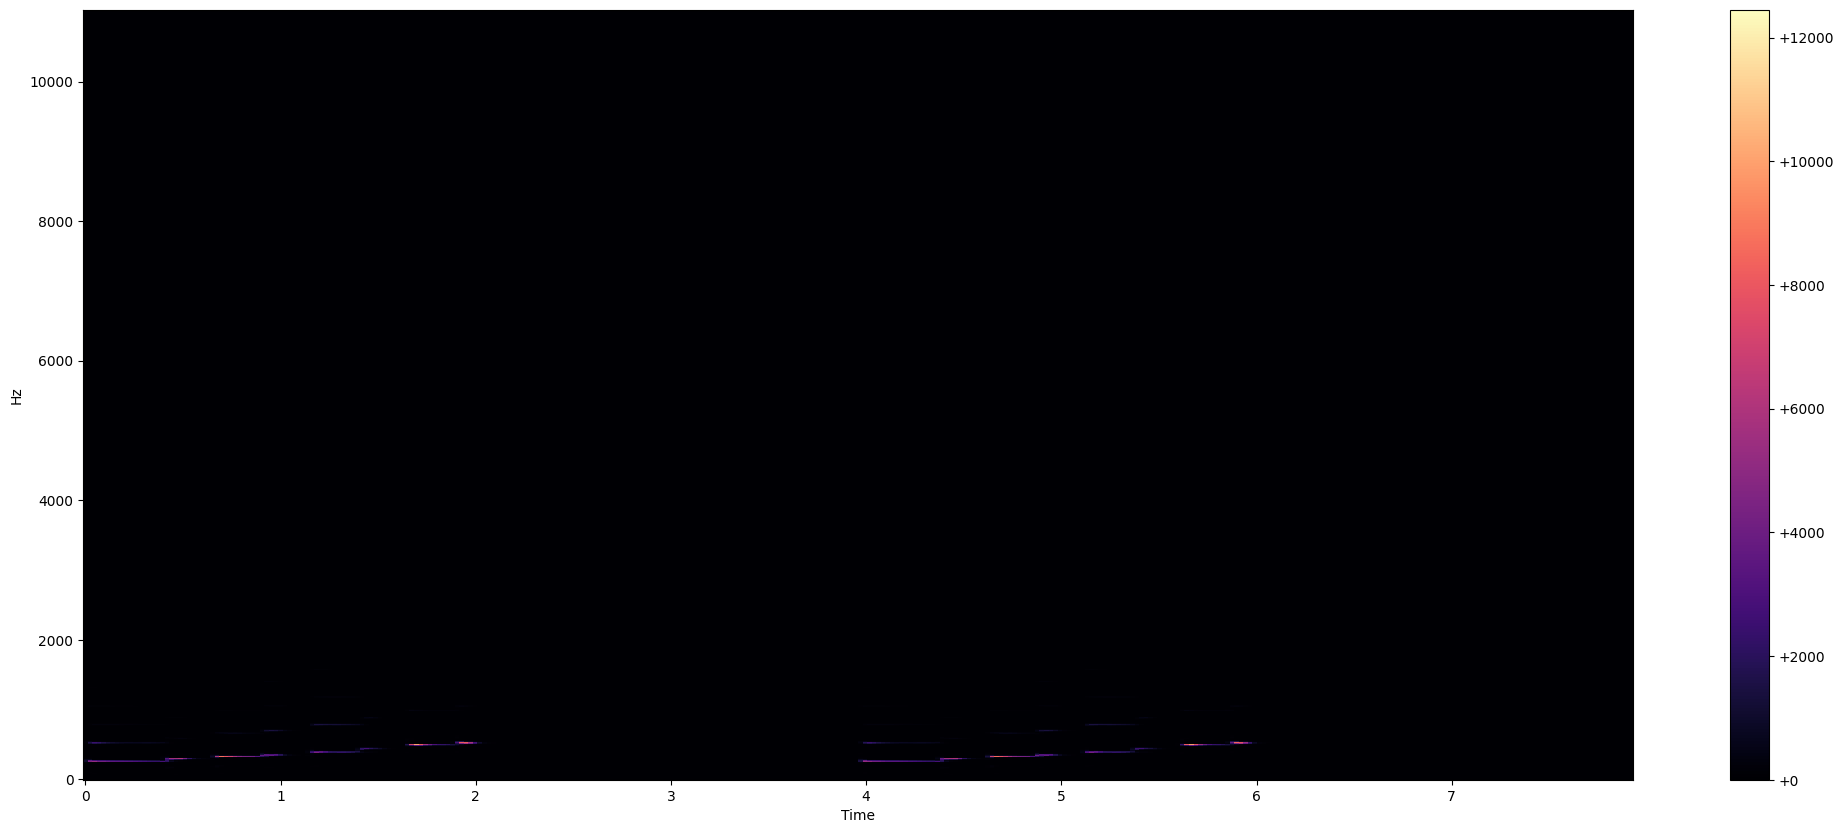

In [36]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

##### Log Amplitude Spectrogram

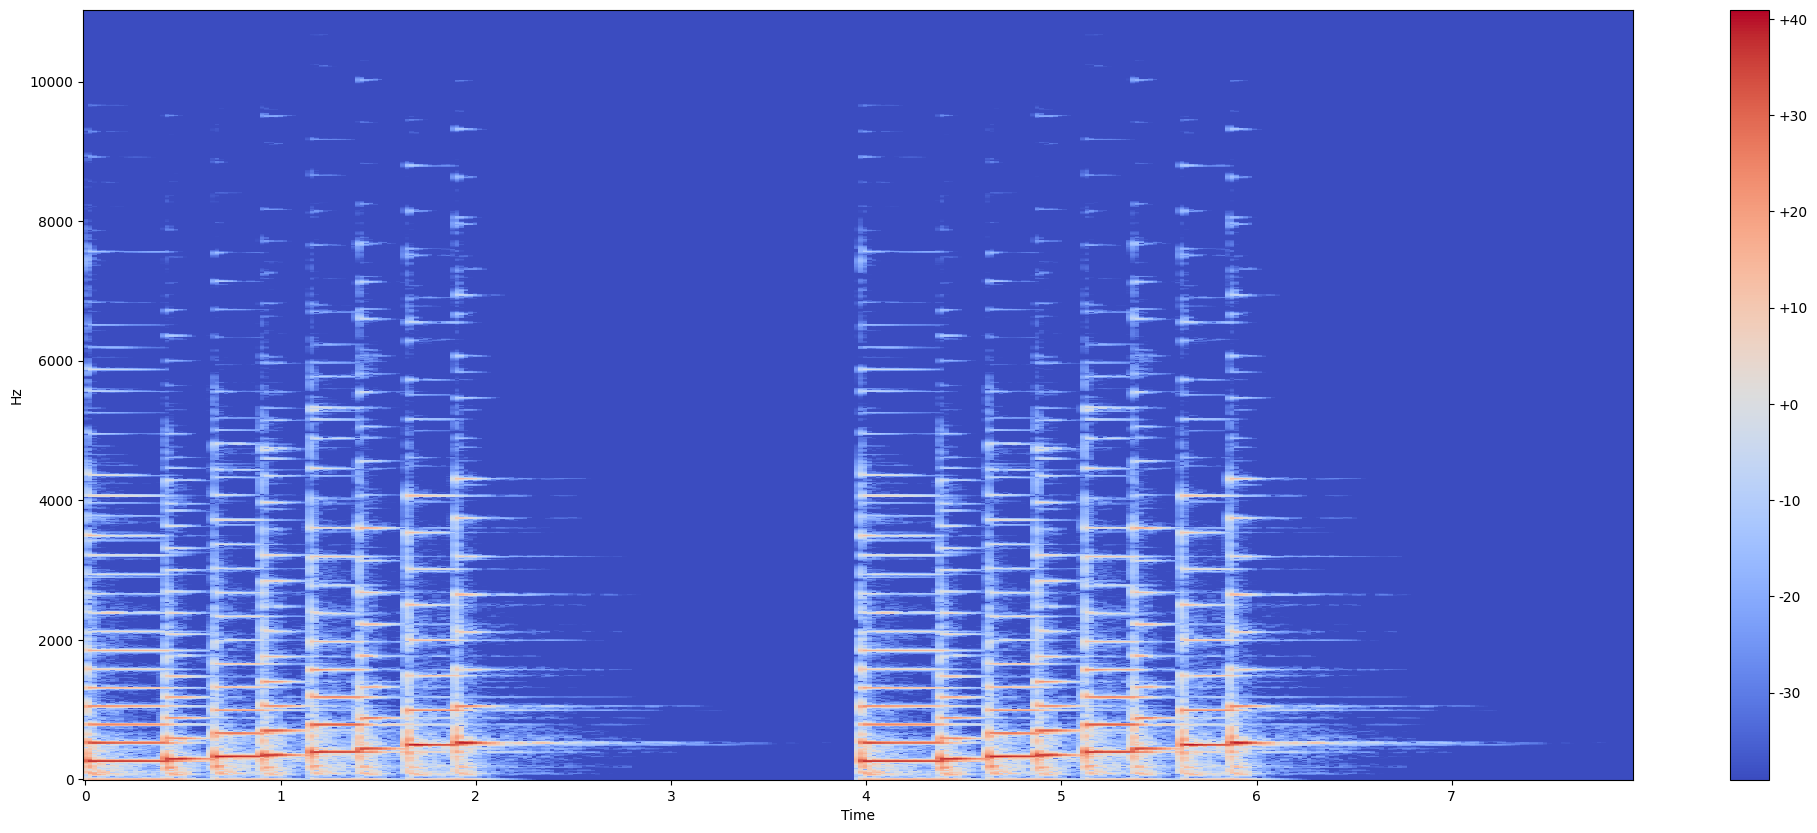

In [37]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

##### Log Frequency Spectrogram

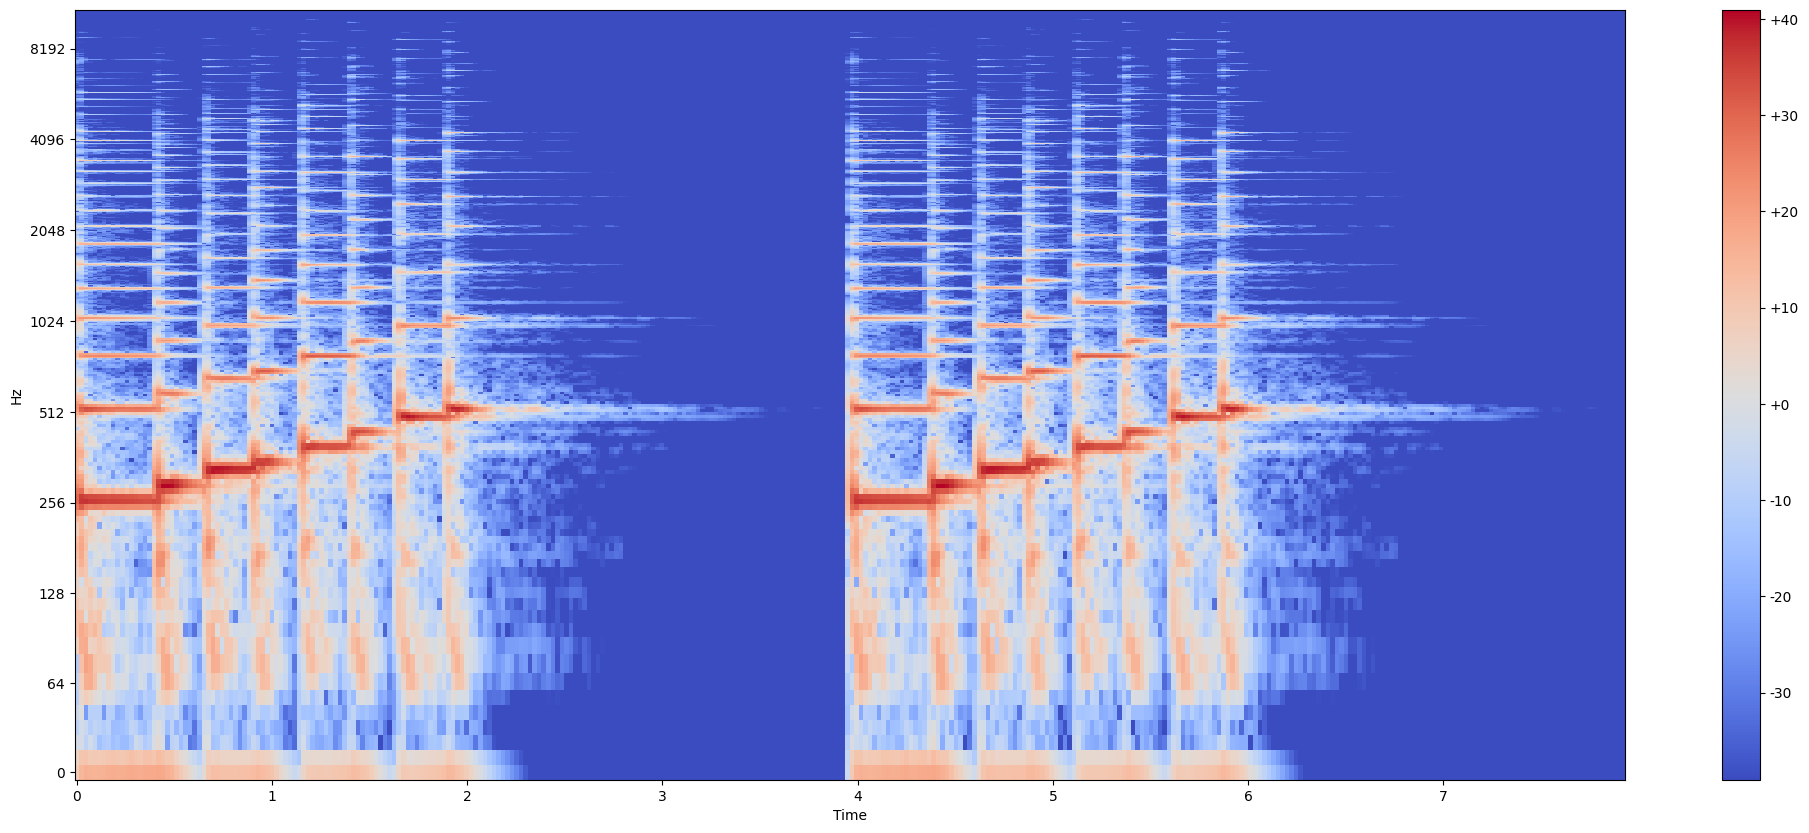

In [38]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

##### Visualizing Songs from different genres:

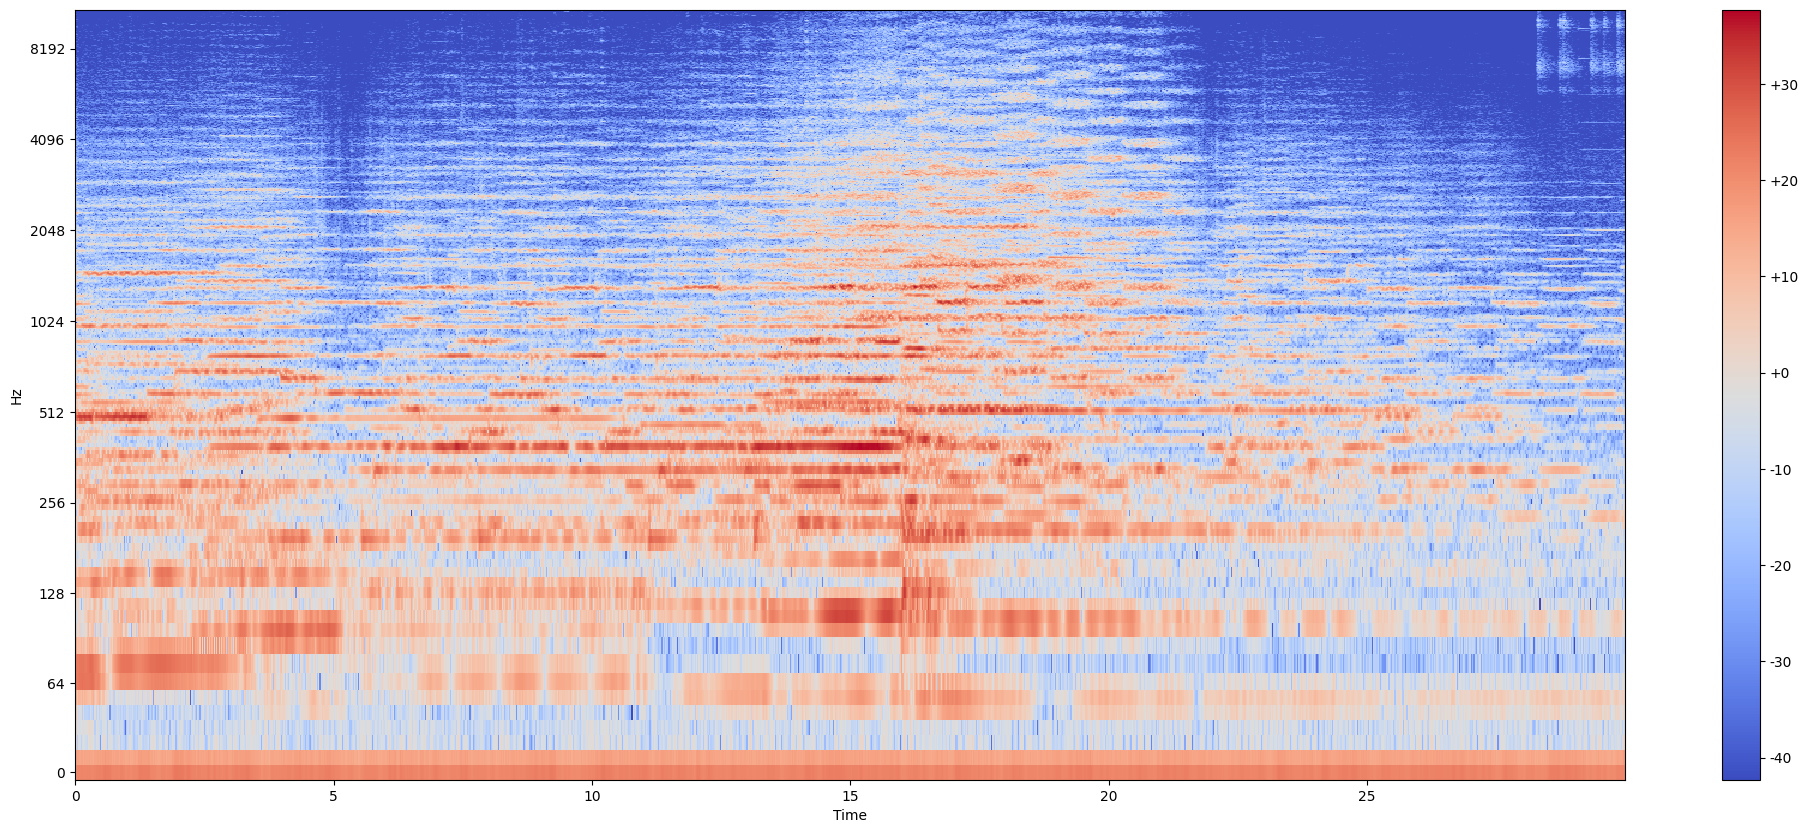

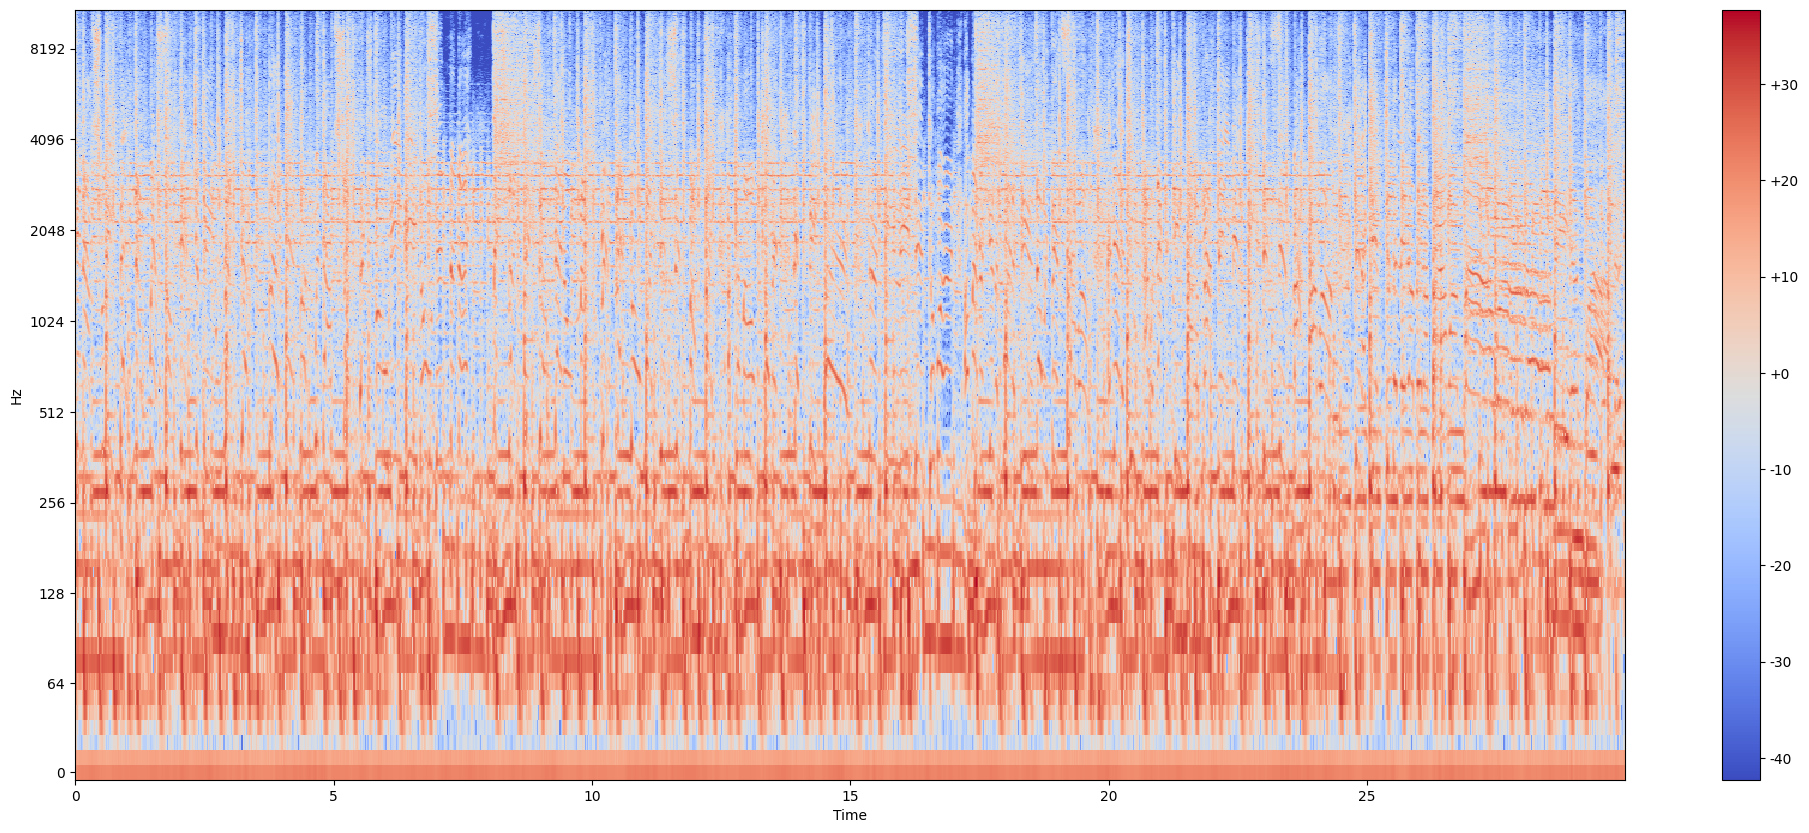

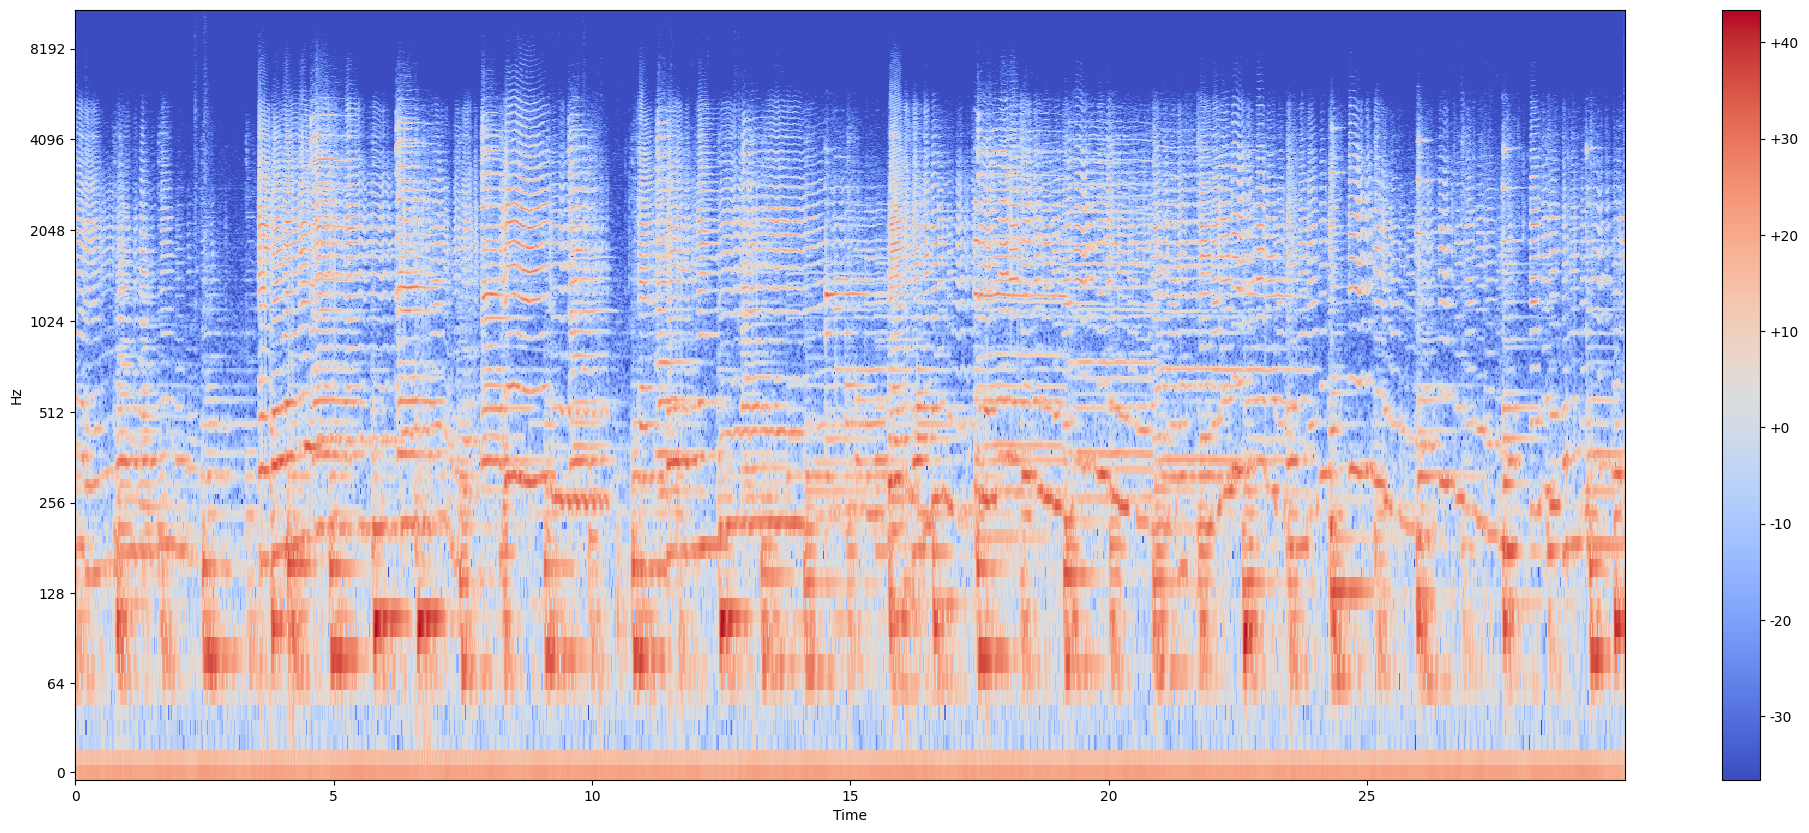

In [39]:
S_debussy = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_redhot = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_duke = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)


Y_debussy = librosa.power_to_db(np.abs(S_debussy) ** 2)
Y_redhot = librosa.power_to_db(np.abs(S_redhot) ** 2)
Y_duke = librosa.power_to_db(np.abs(S_duke) ** 2)

plot_spectrogram(Y_debussy, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_redhot, sr, HOP_SIZE, y_axis="log")
plot_spectrogram(Y_duke, sr, HOP_SIZE, y_axis="log")